## Cricket Scores Analysis 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
filePath = "odiData.csv"
odi = pd.read_csv(filePath)

In [4]:
odi.drop(columns=["Unnamed: 0", "Unnamed: 13"], errors='ignore', inplace=True)

In [5]:
odi.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.2,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [6]:
numeric_cols = ['Mat', 'Inns' ,'NO' ,'Runs' ,'HS' ,'Ave' ,'BF' ,'SR' ,'100' ,'50', '0']

In [7]:
for num in numeric_cols:
    odi[num] = pd.to_numeric(odi[num], errors='coerce')

In [8]:
odi.fillna({
    'Inns': odi['Inns'].median(),
    'NO': 0,
    'Runs': odi['Runs'].median(),
    'Ave': odi['Ave'].mean(),
    'BF': odi['BF'].median(),
    'SR': odi['SR'].mean(),
    '100': 0,
    '50': 0,
    '0': 0
}, inplace=True)


### Defining functions that returns the columns of DataFrame

In [10]:
def top_scorers(n=10):
    return odi[['Player', 'Runs']].sort_values(by='Runs', ascending=False).head(n)    

In [11]:
def top_century_makers(n=10):
    return odi[['Player', '100']].sort_values(by='100', ascending=False).head(n)

In [12]:
def best_averages(n=10):
    return odi[df['Inns'] >= 50][['Player', 'Ave']].sort_values(by='Ave', ascending=False).head(n)

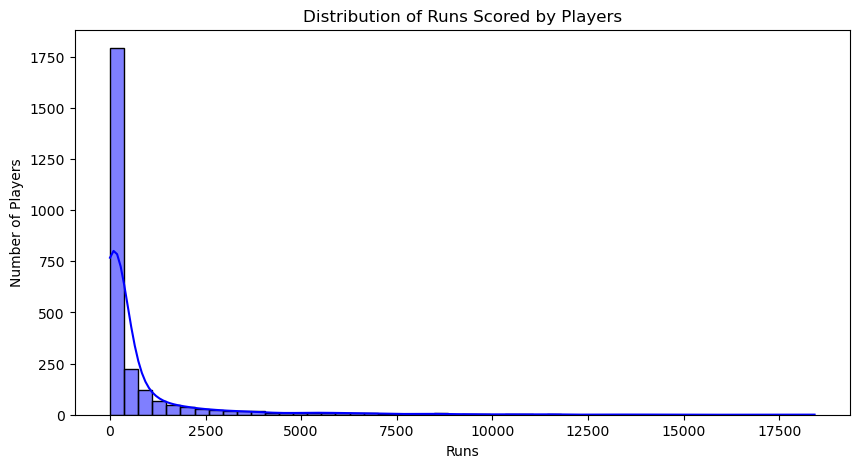

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(odi['Runs'], bins=50, kde=True, color='blue')
plt.title("Distribution of Runs Scored by Players")
plt.xlabel("Runs")
plt.ylabel("Number of Players")
plt.show()

C:\Users\sagar\AppData\Local\Temp\ipykernel_17980\2530179203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10['Runs'], y=top_10['Player'], palette='magma')


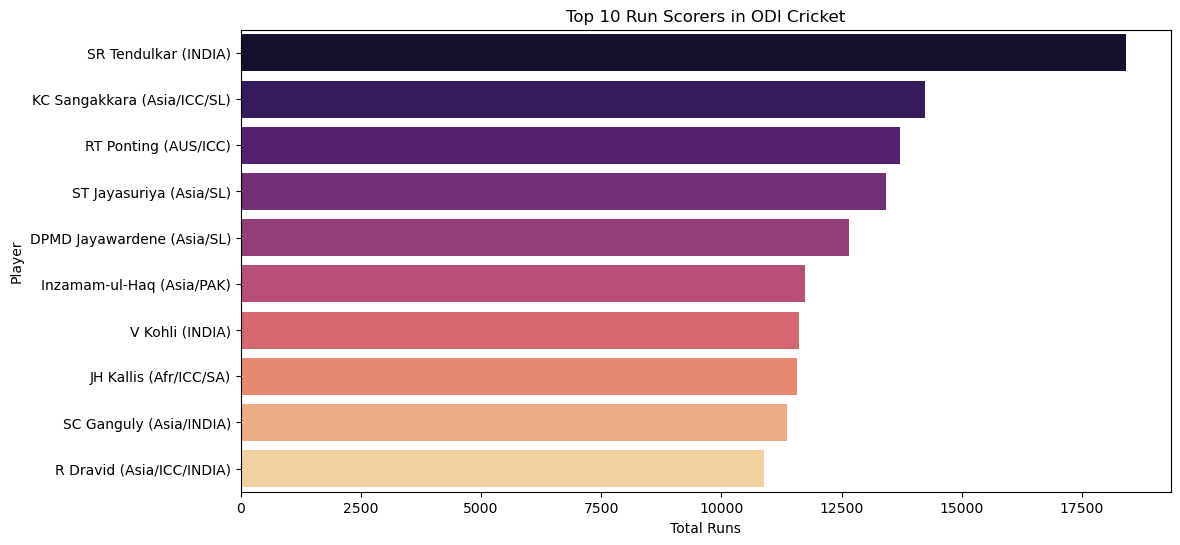

In [14]:
top_10 = top_scorers()
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10['Runs'], y=top_10['Player'], palette='magma')
plt.title("Top 10 Run Scorers in ODI Cricket")
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.show()

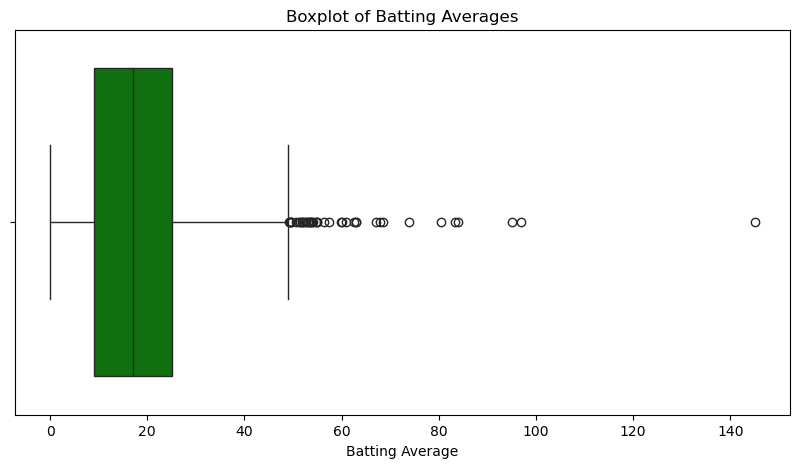

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=odi['Ave'], color='green')
plt.title("Boxplot of Batting Averages")
plt.xlabel("Batting Average")
plt.show()

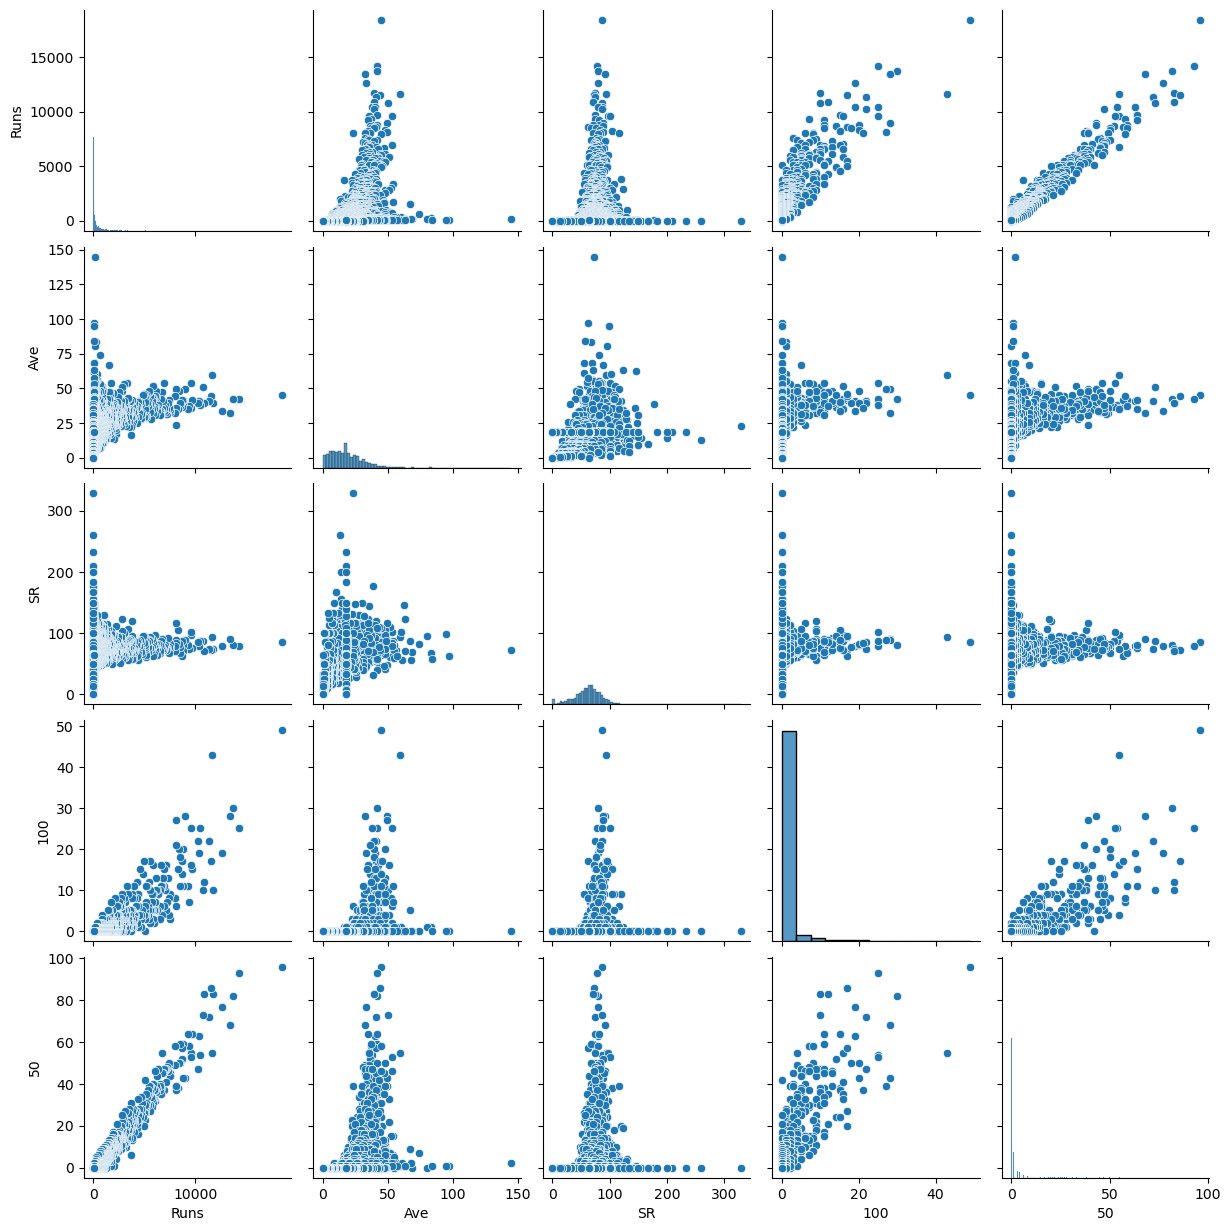

In [35]:
sns.pairplot(odi[['Runs', 'Ave', 'SR', '100', '50']])
plt.show()

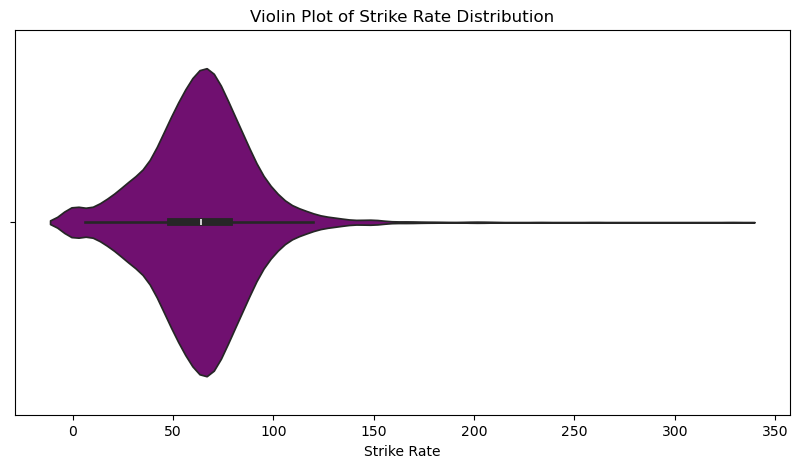

In [37]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=odi['SR'], color='purple')
plt.title("Violin Plot of Strike Rate Distribution")
plt.xlabel("Strike Rate")
plt.show()

In [39]:
odi.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

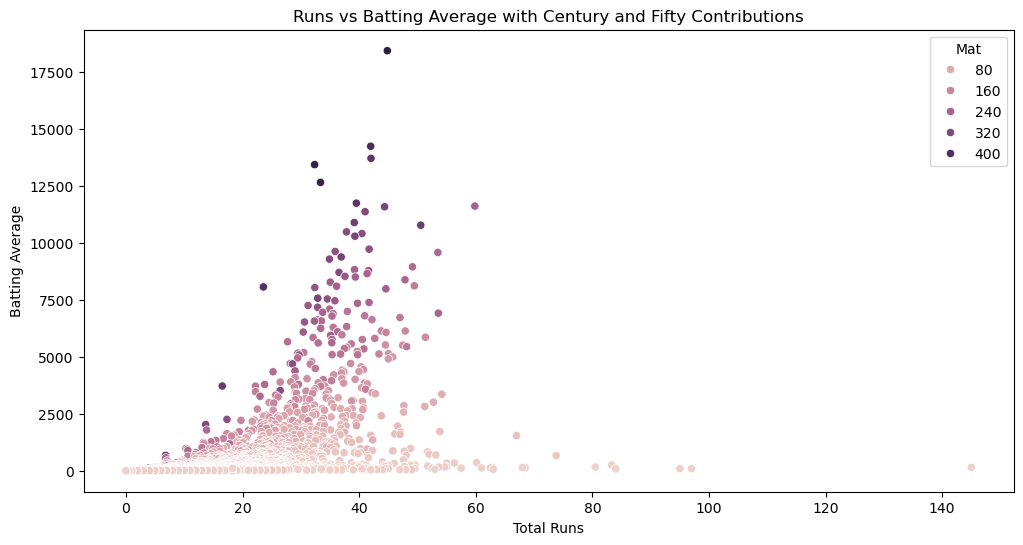

In [43]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=odi['Ave'], y=odi['Runs'], hue=odi['Mat'])
plt.title("Runs vs Batting Average with Century and Fifty Contributions")
plt.xlabel("Total Runs")
plt.ylabel("Batting Average")
plt.show()

C:\Users\sagar\AppData\Local\Temp\ipykernel_17980\285364121.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(odi['SR'], shade=True, color='red')


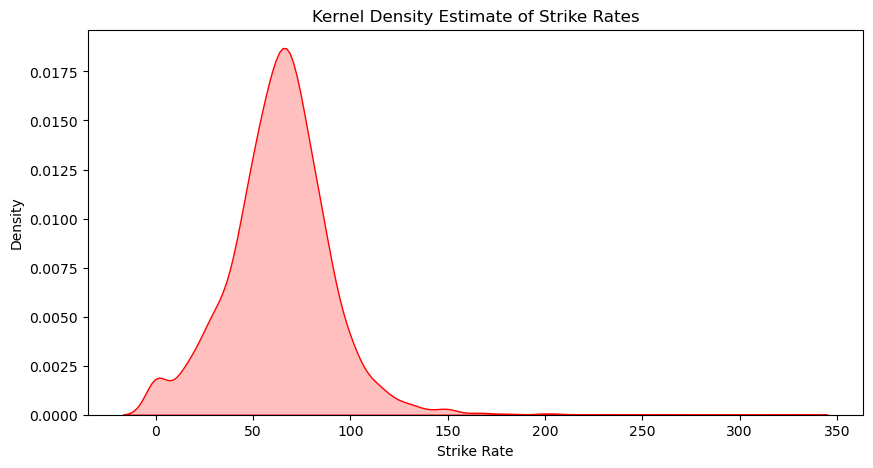

In [47]:
plt.figure(figsize=(10, 5))
sns.kdeplot(odi['SR'], shade=True, color='red')
plt.title("Kernel Density Estimate of Strike Rates")
plt.xlabel("Strike Rate")
plt.show()